The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. 
Other measurements, which are easier to obtain, are used to predict the age. 

In this project, we aim to calculate the rings of the abalone, so as to predict the age of abalone, which is calculated as +/- 1.5 to the rings calculated.

Details of the attributes -

Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 

# Importing the necessary libraries

In [1662]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [1663]:
df = pd.read_csv('abalone.csv')

In [1664]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Let us first check the unique values that are present in the data set for number of rings.

In [1665]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

We will be using the regression models here to predict the rings, since the data is of numeric category.

In [1666]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [1667]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


From the above data, it appears like 'Height', 'Shucked Weight', 'Viscera Weight' and 'Shell Weight' columns might have skewness in the data. Outliers might also be present.

In [1668]:
df.sample(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3264,F,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850,12
3521,I,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
3869,F,0.490,0.385,0.160,0.6560,0.2455,0.1710,0.2050,9
2454,I,0.275,0.200,0.065,0.0920,0.0385,0.0235,0.0270,5
2495,M,0.450,0.360,0.160,0.5670,0.1740,0.1245,0.2250,12
3145,M,0.550,0.420,0.170,0.8465,0.3360,0.2405,0.2450,13
2198,I,0.270,0.190,0.080,0.0810,0.0265,0.0195,0.0300,6
479,M,0.660,0.545,0.185,1.3200,0.5305,0.2635,0.4550,16
895,I,0.255,0.190,0.050,0.0830,0.0295,0.0215,0.0270,6
2442,M,0.475,0.355,0.125,0.4625,0.1860,0.1070,0.1450,9


In [1669]:
#Checking NaN values

df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [1670]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

From the above data, we observe that the data does not have any null values, since all the continuous data is of Float type and not object, and isnull() also gives 0 NaN values.

We will now proceed for Exploratory data analysis

# Exploratory Data analysis

Sex column in the nominal data in the data provided. We will plot a countplot to check for the values 

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

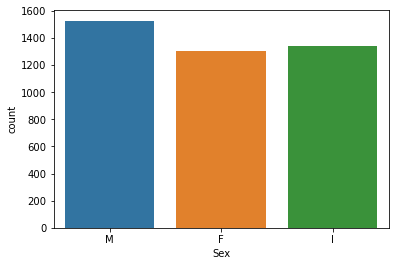

In [1671]:
sns.countplot(df['Sex'])
df['Sex'].value_counts()

From the above data, we see that the samples are almost equally divided into Male, Female and Infants with values 1528, 1307 and 1342 respectively.
The proportion of males is slightly higher than Females and Infants.

We will not plot distribution plots for the continuous types of data.

In [1672]:
df_cont = df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']]

In [1673]:
df_cont

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


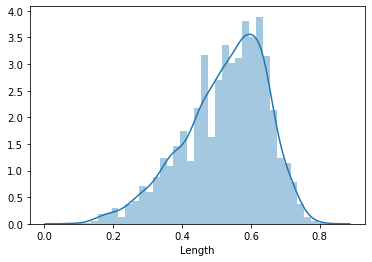

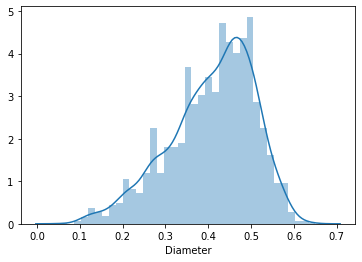

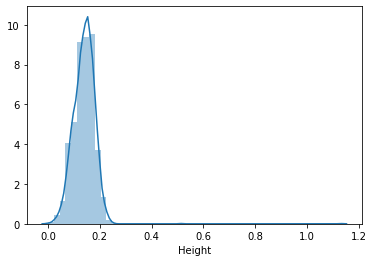

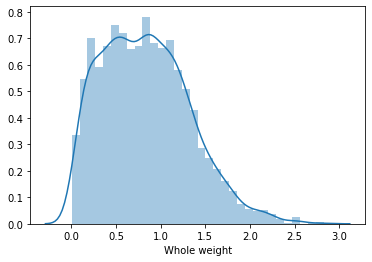

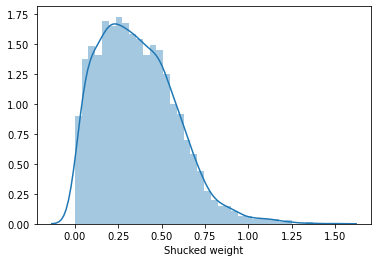

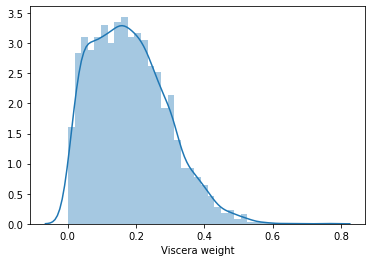

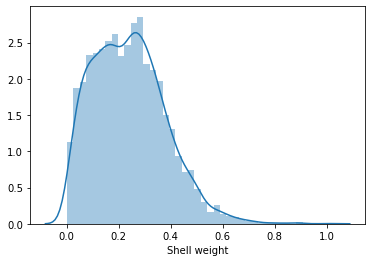

In [1674]:
for i in df_cont.columns:
    sns.distplot(df[i])
    plt.show()

From the above distribution plots, we identify that the data is normally distributed in majority of the cases, with possibility of outliers in length and diameter.
We will check these observations going further.

However, we observe the presence of high skewness in Height column.

'Length' - Data is slightly left skewed, majority of the values are between 0.2 - 0.8

'Diameter' - Data is slightly left skewed, majority of the values are between 0.1 - 0.6

'Height' - Data is highly right skewed, with values between 0.0 and 0.2

'Whole weight' - Data is slightly right skewed, and values are between 0.0 - 2.5

'Shucked weight' - Data is right skewed, and values are between 0.0 to 1.25

'Viscera weight' - Data is right skewed, and majority of the values are between 0.0 - 0.5

'Shell weight' - Data is right skewed and majority of the values are between 0.0 - 0.6

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

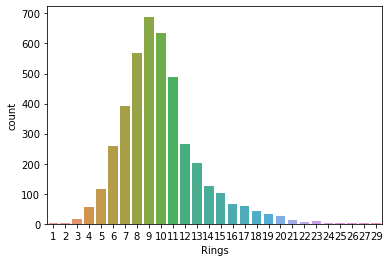

In [1675]:
sns.countplot(df['Rings'])
df['Rings'].value_counts()

From the above data, we observe that majority of the abalones have rings 9 (count = 689) and the range with maximum values is 5 - 16 rings.

We will now check the correlation between the data.

In [1676]:
corr = df.corr()

In [1677]:
corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


Let us visualize the correlation using a heatmap

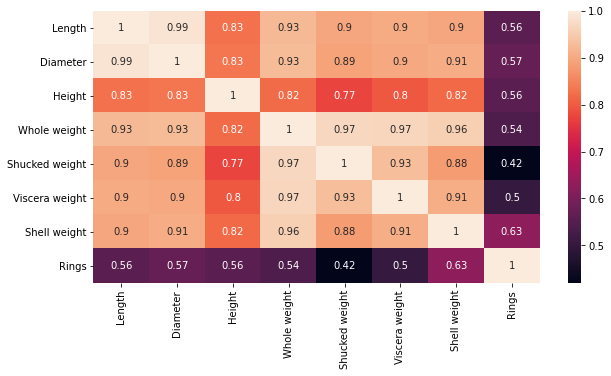

In [1678]:
plt.figure(figsize = (10,5))
sns.heatmap(corr, annot = True)

From the above heatmap, we observe very high correlation between the independent variables with each other.

The number of rings is correlated with Shell weight with a 63% correlation.

Rest of the correlation ranges (rings and other features) are between 42-57%.

Length is highly correlated with the diameter (99%), whole weight is highly correlated with Shucked and Viscera weight (97%)

Shell weight and whole weight are 96% correlated.


Considering that Shell weight impacts the number of rings in the major way out of all other features, we will analyse the Shell Weight field.

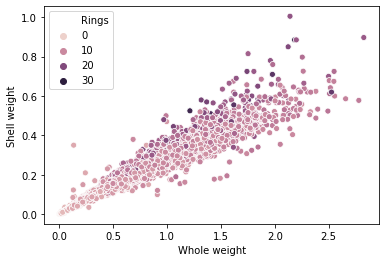

In [1679]:
sns.scatterplot(y = df['Shell weight'], x = df['Whole weight'], hue = df['Rings'])

As the whole weight increases, shell weight also increases.

Also, majority of the values falling between 10 - 20 rings have whole weight between 0.5 to 2.3 and shell weight between 0.2 to 0.6

The whole weight has a range ~0.002 to 2.8 in our dataset (checking the describe result) and the spread of data is similar in the scatterplot, which means the whole weight independently cannot be a factor to identify number of rings.

The higher number of rings have higher shell weight (above 0.4) and higher whole weight (above 0.6).

The shell weight does impact the rings as the range is between ~0.001 to 1, and majority of the scatter in the plot is between 0.0 to 0.6

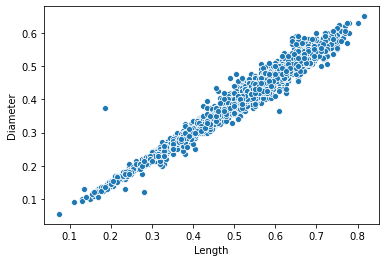

In [1680]:
#Length and diameter correlation

sns.scatterplot(x = df['Length'], y = df['Diameter'])

The scatter between Length and diameter is almost linear. As the length increases, diameter also increases.

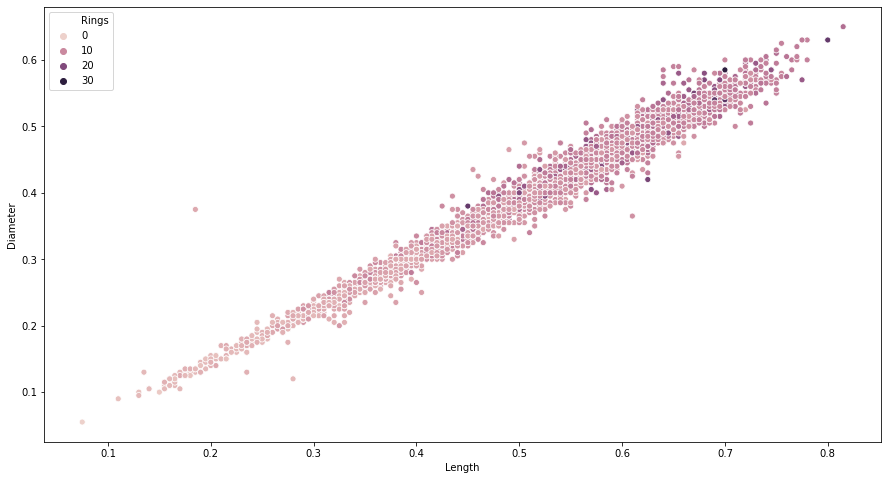

In [1681]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = df['Length'], y = df['Diameter'], hue = df['Rings'])

From the above graph, we see that number of rings increases and length and diameter increases. The maximum number of rings (20 and above) have length  between 0.45 to 0.7 and diameter between 0.35 to 0.6.

This relation is a bit non linear and after these limits, number of rings decreases.

# Data Modeling

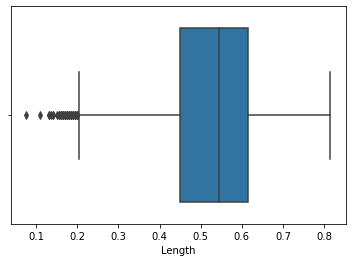

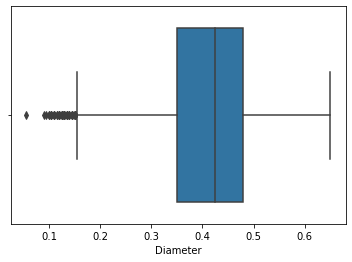

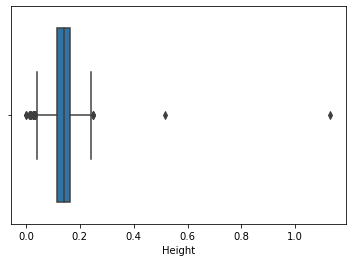

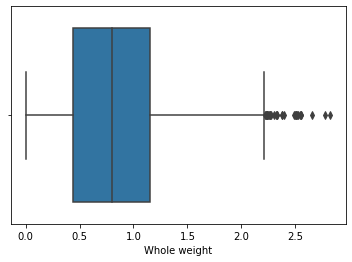

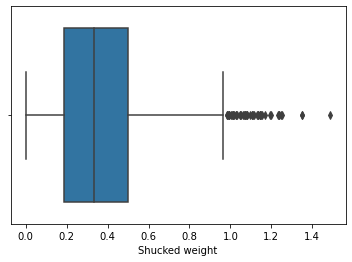

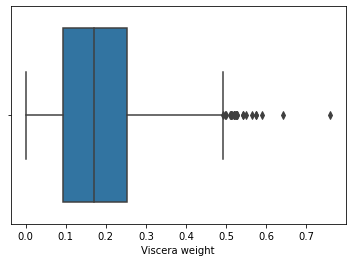

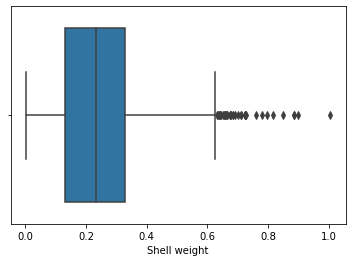

In [1682]:
#Visualizing outliers using boxplot

for i in df_cont.columns:
    sns.boxplot(df[i])
    plt.show()

In [1683]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [1684]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Diameter           59
Height             29
Length             49
Rings             278
Sex                 0
Shell weight       35
Shucked weight     48
Viscera weight     26
Whole weight       30
dtype: int64

We will prepare a new dataframe where we drop the outliers just to confirm how the outliers will impact our predictions.

In [1685]:
from scipy.stats import zscore
import scipy.stats as st

In [1686]:
zs = zscore(df_cont)

In [1687]:
zs

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.17090984,
        -1.20522124, -1.21298732],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.74855917,
         0.97541324,  0.49695471],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  2.64099341,
         1.78744868,  1.84048058]])

In [1688]:
df_no_outlier = df[(np.abs(st.zscore(df_cont)) < 3).all(axis=1)]

In [1689]:
df_no_outlier

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


So now we will be checking our model on data with outliers and without outliers.

# Skewness removal

In [1690]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [1691]:
df_no_outlier.skew()

Length           -0.633786
Diameter         -0.605450
Height           -0.247192
Whole weight      0.323886
Shucked weight    0.449573
Viscera weight    0.429932
Shell weight      0.358512
Rings             1.136367
dtype: float64

In [1692]:
zeros = df['Height']==0

In [1693]:
zeros.value_counts()

False    4175
True        2
Name: Height, dtype: int64

In [1694]:
# Dropping 2 columns with heights as 0
df['Height'] = df['Height'].replace(0,np.NaN)

In [1695]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            2
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [1696]:
df.dropna(inplace=True)

In [1697]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [1698]:
df.skew()

Length           -0.640993
Diameter         -0.610182
Height            3.166364
Whole weight      0.530549
Shucked weight    0.718735
Viscera weight    0.591455
Shell weight      0.621081
Rings             1.113754
dtype: float64

In [1699]:
#Removing skewness from height column using sqrt method as boxcox is not giving desired result and is increasing skewness

df['Height'] = np.sqrt(df['Height'])

In [1700]:
df.skew()

Length           -0.640993
Diameter         -0.610182
Height           -0.176012
Whole weight      0.530549
Shucked weight    0.718735
Viscera weight    0.591455
Shell weight      0.621081
Rings             1.113754
dtype: float64

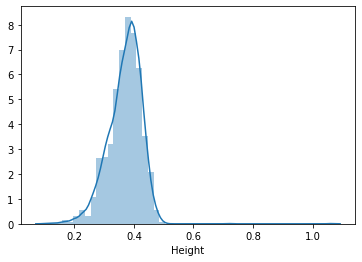

In [1701]:
sns.distplot(df['Height'])

In [1702]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

We have treated the skewness from df dataframe, we will not be treating skewness from df_no_outlier since the skewness threshold is not breached by major difference.

# Encoding the 'Sex' column



In [1703]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [1704]:
df['Sex']= le.fit_transform(df['Sex'])

In [1705]:
df['Sex']

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4175, dtype: int32

# ML classification using various models

In [1706]:
#Splitting the dependent and independent data

x = df.drop('Rings', axis =1)
y = df['Rings']

In [1707]:
#Importing necessary models

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [1708]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.406202,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.367423,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.452769,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.387298,1.0945,0.5310,0.2610,0.2960


In [1709]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4175, dtype: int64

In [1710]:
#Splitting data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=42)

In [1711]:
x_train.shape, y_train.shape

((2922, 8), (2922,))

In [1712]:
dt = DecisionTreeRegressor()
svr = SVR(kernel = 'rbf')
knn = KNeighborsRegressor()
lr = LinearRegression()

In [1713]:
for i in [dt, svr, knn, lr]:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print(i)
    print('R2 score is ',r2_score(y_test, pred))
    print('R2 for train data', r2_score(y_train,i.predict(x_train)))
    print('Mean absolute error is ',mean_absolute_error(y_test, pred))
    print('Mean squared error is ', mean_squared_error(y_test, pred))
    print('------------------------------------------')

DecisionTreeRegressor()
R2 score is  0.17417033944785398
R2 for train data 1.0
Mean absolute error is  2.083000798084597
Mean squared error is  8.911412609736631
------------------------------------------
SVR()
R2 score is  0.4939256919798959
R2 for train data 0.48884625589165487
Mean absolute error is  1.5515444710340363
Mean squared error is  5.46097722736047
------------------------------------------
KNeighborsRegressor()
R2 score is  0.536088745978278
R2 for train data 0.6647758041780318
Mean absolute error is  1.5660015961691938
Mean squared error is  5.006001596169194
------------------------------------------
LinearRegression()
R2 score is  0.5610852036337112
R2 for train data 0.5213349249789578
Mean absolute error is  1.5803255197576058
Mean squared error is  4.736268310251076
------------------------------------------


# Checking model performance by removing outliers

In [1714]:
df_no_outlier['Sex'] = le.fit_transform(df_no_outlier['Sex'])

In [1715]:
x_try = df_no_outlier.drop('Rings', axis = 1)

In [1716]:
y_try = df_no_outlier['Rings']

In [1717]:
lr2 = LinearRegression()

In [1718]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_try, y_try, test_size = 0.2, random_state = 42)

In [1719]:
lr2.fit(x_train1, y_train1)

LinearRegression()

In [1720]:
testing = lr2.predict(x_test1)

In [1721]:
r2_score(y_test1, testing)

0.4811632140337243

The r2 score has decreased on the data with no outliers, hence we will not be dropping the outliers, and will stick to our original dataframe df only.

# Ensemble techniques

In [1722]:
from sklearn.ensemble import RandomForestRegressor

In [1723]:
rfr = RandomForestRegressor()

In [1724]:
rfr.fit(x_train, y_train)
predict = rfr.predict(x_test)
print('R2 score is ',r2_score(y_test, pred))
print('R2 for train data', r2_score(y_train,rfr.predict(x_train)))
print('Mean absolute error is ',mean_absolute_error(y_test, pred))
print('Mean squared error is ', mean_squared_error(y_test, pred))

R2 score is  0.5610852036337112
R2 for train data 0.9335869058716625
Mean absolute error is  1.5803255197576058
Mean squared error is  4.736268310251076


Random forest is overfitting on train data. Hence we go with the Linear Regression model.

# Cross validation

In [1725]:
from sklearn.model_selection import cross_val_score

In [1726]:
for i in [dt, svr, knn, lr, rfr]:
    cv = cross_val_score(i, x, y, cv=5, scoring = 'r2')
    print(i, cv.mean())

DecisionTreeRegressor() -0.14326957659476852
SVR() 0.4431357426555909
KNeighborsRegressor() 0.42780132842208857
LinearRegression() 0.4117930736823109
RandomForestRegressor() 0.4403096985175405


# Regularization methods

Since the models seems to be slightly overfitting, we will check the regularization models to evaluate performance, and avoiding any overfitting

In [1727]:
#Importing models

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

ls = Lasso(alpha = 0.0001)
rd = Ridge(alpha = 0.0001)

In [1728]:
#Fitting the model

ls.fit(x_train, y_train)

Lasso(alpha=0.0001)

In [1729]:
#Prediction

t = ls.predict(x_test)

In [1730]:
#Scoring

print('Test data',r2_score(y_test, t))
print('Test data',r2_score(y_train, ls.predict(x_train)))


Test data 0.5608827533607255
Test data 0.5213185102720765


In [1731]:
#Fitting in ridge

rd.fit(x_train, y_train)

Ridge(alpha=0.0001)

In [1732]:
#Prediction

r = rd.predict(x_test)

In [1733]:
#Scoring

print('Test data',r2_score(y_test, r))
print('Test data',r2_score(y_train, rd.predict(x_train)))

Test data 0.5610845309085737
Test data 0.5213349248160627


In [1734]:
#Elastic net model

from sklearn.linear_model import ElasticNet

In [1735]:
el = ElasticNet(alpha = 0.0001)

In [1736]:
#Fitting the model

el.fit(x_train, y_train)

ElasticNet(alpha=0.0001)

In [1737]:
#Prediction and scoring

p = el.predict(x_test)
print('Test data',r2_score(y_test, p))
print('Test data',r2_score(y_train, el.predict(x_train)))

Test data 0.5597289576700702
Test data 0.5210409964796987


In [1738]:
#Cross validation of regularization models

for i in [ls, rd, el]:
    cv = cross_val_score(i, x, y, cv=5, scoring = 'r2')
    print(i, cv.mean())

Lasso(alpha=0.0001) 0.412053315161907
Ridge(alpha=0.0001) 0.4117947441768342
ElasticNet(alpha=0.0001) 0.4138125836519734


From the above data, we see that we get similar results for cross validation for all the models.

So we will stick to Linear Regression model and try to hypertune the model.

# Hypertuning

In [1739]:
from sklearn.model_selection import GridSearchCV

In [1740]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False]}

gcv_lr = GridSearchCV(lr,parameters, cv=5)

In [1741]:
res = gcv_lr.fit(x_train,y_train)

In [1742]:
res.best_params_

{'fit_intercept': False, 'normalize': True}

In [1743]:
res.best_score_

0.5134332579527552

# Saving the best model

In [1744]:
import joblib

joblib.dump(lr, 'abalone_model.obj')

['abalone_model.obj']

# Conclusion

We have saved Linear regression as the best model for predicting the number of rings of an abalone, which in turn helps to identify the age of abalone.

We have achieved an accuracy of ~53%

In [1745]:
check = joblib.load('abalone_model.obj')

final_result = check.predict(x_test)
r2_score(y_test, final_result)


0.5610852036337112

In [1746]:
checking = final_result.astype(int)

In [1747]:
r2_score(y_test,checking)

0.5307281751564242

In [1748]:
result = pd.DataFrame({'Actual':y_test,'Predicted':checking})

In [1749]:
result

,Actual,Predicted
2331,15,13
2412,7,7
2196,11,7
2382,11,10
3572,9,10
...,...,...
925,7,8
2958,12,10
547,7,5
1449,6,8
